# PA 2: Classification - Decision Tree

## Student Details (1 Point)

First Student Name and ID: Chandra Shekhar Kasturi 1001825454

Notes: When submitting, fill your name and ID in this cell.  [1 point]


Do not to forget to cite any external sources used by you.

## Programming Assignment Details (7 Points)


For this assignment use Jupyter notebook, Panda, and scikit.

1) Load Heart dataset from cardio_train.csv  [1 points]

### Features:

* Age | Objective Feature | age | int (days)
* Height | Objective Feature | height | int (cm) |
* Weight | Objective Feature | weight | float (kg) |
* Gender | Objective Feature | gender | categorical code |
* Systolic blood pressure | Examination Feature | ap_hi | int |
* Diastolic blood pressure | Examination Feature | ap_lo | int |
* Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
* Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
* Smoking | Subjective Feature | smoke | binary |
* Alcohol intake | Subjective Feature | alco | binary |
* Physical activity | Subjective Feature | active | binary |
* Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.


2) Create a dataframe and print the first and last five records of your dataset.  [2 points]

3) Print the class labels.  [2 points]


4) Split your dataset 70% for training, and 30% for testing the classifier.  [2 points]

# DecisionTree (10 Points)
1) Use gini and entropy to measure the quality of a split.  [2 points]


2) Use comments to explain your code and variable names. [1 point]


3) Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support. [2 points]


4) Print the decision tree visualization.  [5 points]


# Naive Bayes (10 Points)


1) Use Naive bayes classifier (Gaussian) to predict the test data[5 point] 


2) Use comments to explain your code and variable names[1 point]


3) Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support).  [4 points]

## Report (20 Points)


1) Describe the Decision Tree methods, and Naive Bayes classifier. Dont copy paste it from the internet. Write it on your own.  [4 points]


2) Describe the datasets [3 points]  like what do you understand from the dataset? and if you have done any pre-processing , and your code, please write down your observation. [2 points]


4) Visualization of the decision tree for gini and entropy.[4 points]

5) Interpret your results, compare gini and entropy [3 points]

6) Visualize the dataset, for the target variable - 2 graphs [4 points]

Do not to forget to cite your sources!


## Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn.

In [1]:
# Importing the libraries 

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree # tree diagram

# Load the required cardio dataset using pandas' read CSV function.

data=pd.read_csv('cardio_train.csv',sep=';',encoding='utf8')


# Dispalying first records of the dataset

print("first five records of the dataset\n");
print(data.head(5))
print("\n")


# Dispalying last records of the dataset

print("last five records of the dataset\n");
print(data.tail(5))


# Printing the class labels of the dataset
print("\nThe Class labels for the dataset\n")
print(data['cardio'])


# Divide given columns into two types of variables target variable(label) and feature variables(features).

label=data['cardio']
#omitting id as it is not significant for classification.
features=data.drop(['cardio','id'], axis=1)


# Splitting the dataset 70% for training, and 30% for testing the classifier using function train_test_split().

features_train,features_test,label_train,label_test=train_test_split(features,label,train_size=0.7,test_size=0.3)



first five records of the dataset

   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


last five records of the dataset

          id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180  

 Using Entropy to measure the quality of the split: 

Predicted values: [1 0 1 ... 1 1 0] 

Accuracy : 72.7904761904762 

Confusion Matrix: 
 [[8549 1913]
 [3801 6737]] 


Graphical Visualization of confusion matrix using entropy



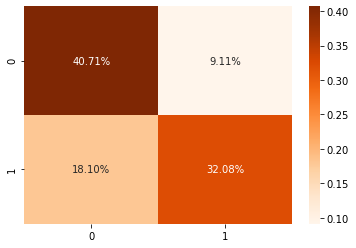

Classification Report: 
                precision    recall  f1-score   support

           0       0.69      0.82      0.75     10462
           1       0.78      0.64      0.70     10538

    accuracy                           0.73     21000
   macro avg       0.74      0.73      0.73     21000
weighted avg       0.74      0.73      0.73     21000


------------------------------------------------------

 Using Gini to measure the quality of the split

Predicted values: [1 0 1 ... 1 1 0] 

Accuracy : 72.76666666666667 

Confusion Matrix: 
 [[8555 1907]
 [3812 6726]] 


Graphical Visualization of confusion matrix using Gini



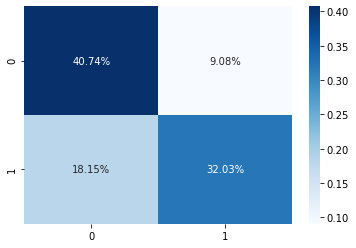

Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.82      0.75     10462
           1       0.78      0.64      0.70     10538

    accuracy                           0.73     21000
   macro avg       0.74      0.73      0.73     21000
weighted avg       0.74      0.73      0.73     21000



In [2]:
#Building Decision Tree Model
   
    
# Importing the libraries

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 

# Evaluating the model to measure the quality of the split using entropy

print(" Using Entropy to measure the quality of the split: \n")
Dtree_entropy = DecisionTreeClassifier(criterion = "entropy", random_state=100, max_depth=5, min_samples_leaf = 5)
Dtree_entropy.fit(features_train,label_train)
cardio_entropy = Dtree_entropy.predict(features_test)
print("Predicted values:",cardio_entropy,"\n")
print("Accuracy :", accuracy_score(label_test,cardio_entropy)*100,"\n")


# Confusion matrix, classification_report(precision, recall, f1-score, and support)

print("Confusion Matrix: \n",confusion_matrix(label_test,cardio_entropy),'\n')
print("\nGraphical Visualization of confusion matrix using entropy\n")
cf_matrix=confusion_matrix(label_test,cardio_entropy)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Oranges')
plt.show()
print("Classification Report: \n ",classification_report(label_test,cardio_entropy))


# Evaluating the model to measure the quality of the split using gini
print("\n------------------------------------------------------\n")
print(" Using Gini to measure the quality of the split\n")
Dtree_gini = DecisionTreeClassifier(criterion = "gini", random_state=100, max_depth=5, min_samples_leaf = 5)
Dtree_gini.fit(features_train,label_train)
cardio_gini = Dtree_gini.predict(features_test)
print("Predicted values:",cardio_gini,"\n")
print("Accuracy :", accuracy_score(label_test,cardio_gini)*100,"\n")


#Confusion matrix, classification_report(precision, recall, f1-score, and support)

print("Confusion Matrix: \n",confusion_matrix(label_test,cardio_gini),'\n')
print("\nGraphical Visualization of confusion matrix using Gini\n")
cf_matrix=confusion_matrix(label_test,cardio_gini)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
plt.show()

print("Classification Report: \n",classification_report(label_test,cardio_gini))


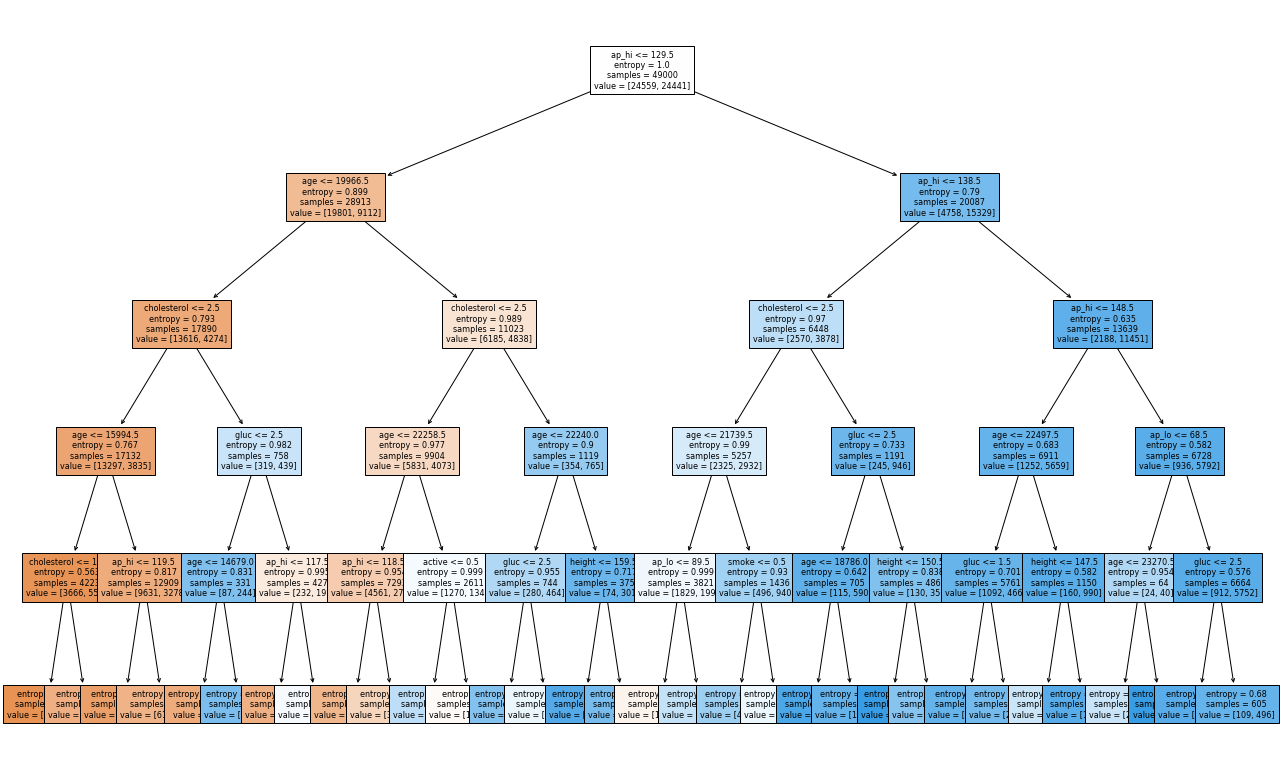

In [3]:
#Decision tree with Entropy Visualization

# Storing the list of feature names in feature_names variable

feature_names = list(data.columns[1:12])


plt.figure(figsize=(22,14))

#plot_tree() function plots the decision tree

plot_tree(Dtree_entropy, feature_names = feature_names, filled = True,fontsize=8)

plt.savefig('Decison-tree(entropy)_visualization.png',dpi=100) 

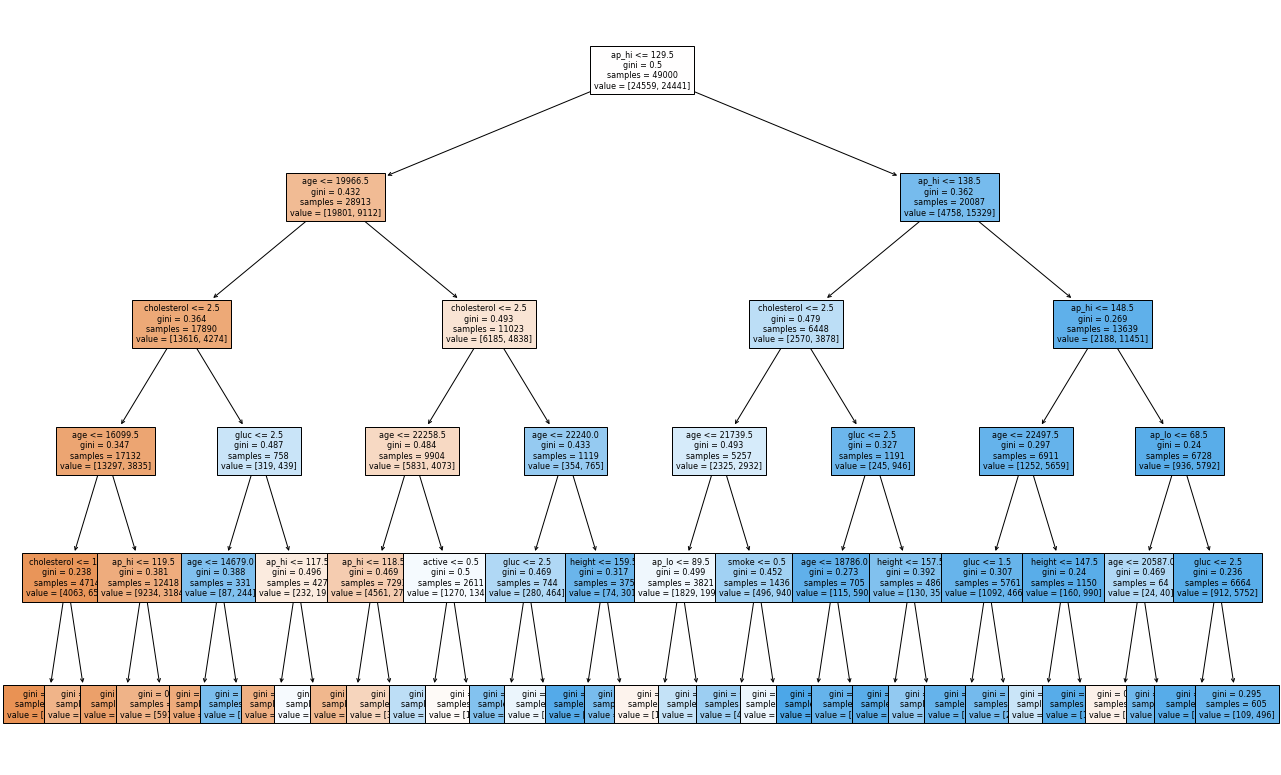

In [4]:
#Decision tree with Gini Visualization

# Storing the list of feature names in feature_names variable

feature_names = list(data.columns[1:12])


plt.figure(figsize=(22,14))

#plot_tree() function plots the decision tree

plot_tree(Dtree_gini, feature_names = feature_names, filled = True,fontsize=8)

plt.savefig('Decison-tree(gini)_visualization.png',dpi=100) 

Accuracy: 0.5989047619047619
Confusion Matrix: 
 [[9093 1369]
 [7054 3484]] 


Graphical Visualization of confusion matrix using Naive Bayes Classifier



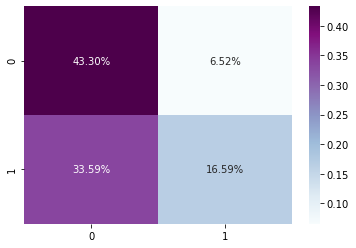

Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.87      0.68     10462
           1       0.72      0.33      0.45     10538

    accuracy                           0.60     21000
   macro avg       0.64      0.60      0.57     21000
weighted avg       0.64      0.60      0.57     21000



In [5]:
# Navie Bayes Classifier

# Importing Libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics


gnb = GaussianNB()

# Fitting the data 

gnb.fit(features_train, label_train)

# Predicting the test data

predictions = gnb.predict(features_test)


# Calculating the Accuracy

print("Accuracy:",metrics.accuracy_score(label_test, predictions))


# Confusion matrix, classification_report(precision, recall, f1-score, and support)

print("Confusion Matrix: \n",confusion_matrix(label_test,predictions),'\n')
print("\nGraphical Visualization of confusion matrix using Naive Bayes Classifier\n")
cf_matrix=confusion_matrix(label_test,predictions)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='BuPu')
plt.show()
print("Classification Report: \n",classification_report(label_test,predictions))
